In [5]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from future import standard_library
standard_library.install_aliases()
from future.builtins import (
         bytes, dict, int, list, object, range, str,
         ascii, chr, hex, input, next, oct, open,
         pow, round, super, filter, map, zip)

In [6]:
import pandas as pd

In [7]:
import matplotlib
%matplotlib inline

In [8]:
google = pd.read_csv('data/goog.csv', index_col='Date', parse_dates=True)  # google stock data from 2010 to 2014
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [9]:
type(google)

pandas.core.frame.DataFrame

In [10]:
# show columns
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [13]:
# show a snippet of the data
google.head(10)  # show first 10 rows

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-11,301.93,301.93,296.72,300.25,NaN
2010-01-12,298.74,298.78,293.71,294.94,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN


In [14]:
# show info about the data frame
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  194 non-null    float64
dtypes: float64(5)
memory usage: 58.9 KB


In [15]:
# Access an entire column using [<column name>]
google['Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
               ...  
2014-12-24    530.51
2014-12-26    528.77
2014-12-29    532.19
2014-12-30    528.09
2014-12-31    531.25
Name: Open, Length: 1257, dtype: float64

In [16]:
# show first 5 rows of 'Open' column

google['Open'].iloc[0:5]  # i indicates an index location

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

In [17]:
# Inspect the first 5 rows or the 'Open' column, using date indexing

google.loc['2010-01-04':'2010-01-08','Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

In [23]:
# Filtering by conditional
google_up = google[ google['Close'] > google['Open'] ]  # close price is greater than open price
google_up.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN
2010-01-19,290.45,294.91,287.86,293.52,NaN
2010-01-26,268.72,274.53,267.88,270.94,NaN


In [24]:
google_up.info  # how many instances of the above scenario exist?

<bound method DataFrame.info of               Open    High     Low   Close     Volume
Date                                                 
2010-01-08  295.70  301.32  294.26  300.71        NaN
2010-01-13  287.96  293.90  286.66  293.25        NaN
2010-01-14  291.66  296.80  291.11  294.63        NaN
2010-01-19  290.45  294.91  287.86  293.52        NaN
2010-01-26  268.72  274.53  267.88  270.94        NaN
...            ...     ...     ...     ...        ...
2014-12-19  511.51  517.72  506.91  516.35  3680148.0
2014-12-22  516.08  526.46  516.08  524.87  2723599.0
2014-12-23  527.00  534.56  526.29  530.59  2191567.0
2014-12-26  528.77  534.25  527.31  534.03  1037727.0
2014-12-30  528.09  531.15  527.13  530.42   873923.0

[605 rows x 5 columns]>

In [27]:
# Filtering out missing data
google_filtered = google[pd.isnull(google['Volume']) == False ]  # Volume values that are not null
google_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


In [28]:
# show some stats
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.940000e+02
mean,375.275593,378.450247,372.132474,375.327064,1.937264e+06
std,115.684354,116.288827,114.935742,115.664301,9.842775e+05
min,218.940000,220.920000,216.600000,217.820000,7.040350e+05
25%,285.790000,288.760000,283.060000,285.450000,1.338451e+06
50%,318.330000,320.800000,315.180000,317.260000,1.684634e+06
75%,452.540000,456.020000,449.740000,452.830000,2.164369e+06
max,612.790000,613.830000,608.690000,609.470000,6.795393e+06


In [29]:
# Compute the returns from daily percent change (the return per day based on percent change)
# Append a new column
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]  # show first 5 rows of new 'Return' column

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [30]:
# Compute the log() of the return using numpy.
# Append another new column
import numpy as np
google['LogReturn'] = np.log(1+google['Return'])
google['LogReturn'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

In [34]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
window_size = 252
google['Volatility'] = google['LogReturn'].rolling(window=window_size).std() * np.sqrt(window_size)  # pd.rolling_std is deprecated!
google['Volatility'].iloc[window_size-5:window_size+5]

Date
2010-12-28         NaN
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03         NaN
2011-01-04    0.278561
2011-01-05    0.278770
2011-01-06    0.277694
2011-01-07    0.276720
2011-01-10    0.276432
Name: Volatility, dtype: float64

In [35]:
google

,Open,High,Low,Close,Volume,Return,LogReturn,Volatility
Date,,,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,NaN,NaN,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN,-0.004408,-0.004418,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN,-0.025186,-0.025509,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN,-0.023303,-0.023578,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN,0.013345,0.013256,NaN
...,...,...,...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0,-0.003430,-0.003436,0.212828
2014-12-26,528.77,534.25,527.31,534.03,1037727.0,0.009948,0.009898,0.213003
2014-12-29,532.19,535.48,530.01,530.33,2276104.0,-0.006928,-0.006953,0.213108


In [36]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1257 non-null   float64
 1   High        1257 non-null   float64
 2   Low         1257 non-null   float64
 3   Close       1257 non-null   float64
 4   Volume      194 non-null    float64
 5   Return      1256 non-null   float64
 6   LogReturn   1256 non-null   float64
 7   Volatility  1005 non-null   float64
dtypes: float64(8)
memory usage: 120.7 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

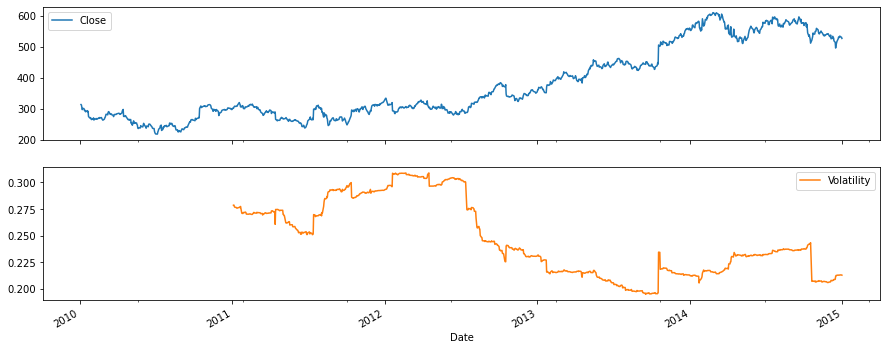

In [38]:
# Columns from a single DataFrame can be plotted using DataFrame.plot().
# Here we will plot the newly created columns of data, LogReturn and Volatility.
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))